## Data Analysis of a Police Check Post Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load Dataset
data="D:\\Chaudhry\\1Python\\Projects\\Big Data\\3. Police Data.csv"
df=pd.read_csv(data)
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### Data Cleaning

In [60]:
# % of Null Values in Data columns
df.isnull().sum()*100/df.shape[0]

stop_date               0.000000
stop_time               0.000000
country_name          100.000000
driver_gender           6.196689
driver_age_raw          6.186007
driver_age              6.572061
driver_race             6.195163
violation_raw           6.195163
violation               6.195163
search_conducted        0.000000
search_type            96.217288
stop_outcome            6.195163
is_arrested             6.195163
stop_duration           6.195163
drugs_related_stop      0.000000
dtype: float64

In [4]:
# Drop Columns With % Null Values > 90%
dfa=df.drop(columns=['country_name','search_type'])

In [64]:
# other all columns have have < 7%  NAN values. So delete all rows with null values
dfa.dropna(inplace=True)

In [59]:
# Check NAN values
dfa.isnull().sum()

stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
year                  0
day                   0
month                 0
year-month            0
violations            0
dtype: int64

In [7]:
dfa.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [63]:
print('No. of features/columns in Dataset : ',dfa.shape[0])
print('No. of records/rows in Dataset : ',dfa.shape[1])

No. of features/columns in Dataset :  61222
No. of records/rows in Dataset :  18


In [8]:
# change stop_date to date formate
dfa['stop_date']=pd.to_datetime(dfa['stop_date'])
# Add Column 'Year' in the dataframe dfa
dfa['year']=dfa['stop_date'].dt.strftime('%Y')
# add week day column in dataframe dfa
dfa['day']=dfa['stop_date'].dt.strftime('%a')
# add Month column in the dataframe dfa
dfa['month']=dfa['stop_date'].dt.strftime('%b')
dfa['year-month']=dfa['stop_date'].dt.strftime('%Y-%m')
# add a columns "violations" for No of violations
dfa['violations'] = 1
dfa.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,day,month,year-month,violations
0,2005-01-02,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,Sun,Jan,2005-01,1
1,2005-01-18,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,Tue,Jan,2005-01,1
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,Sun,Jan,2005-01,1
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,2005,Sun,Feb,2005-02,1
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,Mon,Mar,2005-03,1


#### 1- Violatins Count & % Count (2005~2012)

- Total Violations for the period 2005~2012

In [9]:
dfa_violations=dfa['violations'].sum()
print('Total violations count from 2005~2012 : ',dfa_violations)


Total violations count from 2005~2012 :  61222


- Yearly violaion Count and % Count

In [10]:
dfa_year_violations=dfa.groupby('year')['violations'].count().reset_index()
dfa_year_violations

,year,violations
0,2005,2489
1,2006,10101
2,2007,8888
3,2008,8077
4,2009,7193
5,2010,6952
6,2011,7566
7,2012,9956


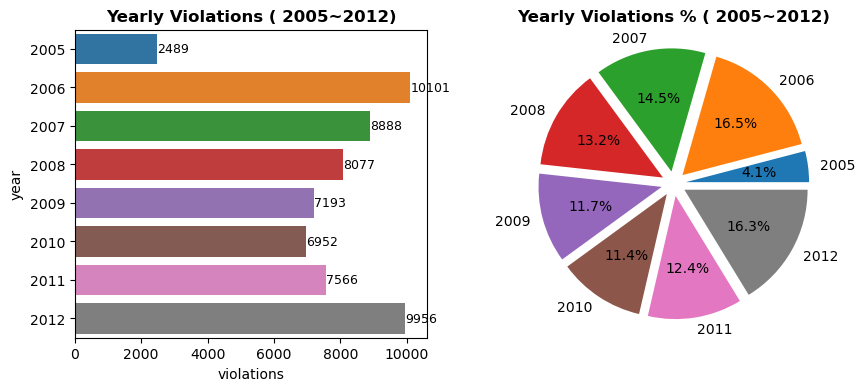

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(121)
ax=sns.barplot(data=dfa_year_violations,y='year',x='violations')
ax.bar_label(ax.containers[0],fontsize=9)
plt.title('Yearly Violations ( 2005~2012)',fontweight='bold')
plt.subplot(122)
plt.pie(dfa_year_violations['violations'],labels=dfa_year_violations['year'],autopct='%1.1f%%',explode=[.1,.1,.1,.1,.1,.1,.1,.1])
plt.title('Yearly Violations % ( 2005~2012)',fontweight='bold')
plt.show()

- Monthly Violation Count (2005~2012)

In [12]:
dfa_month_violations=dfa.groupby('year-month')['violations'].count().reset_index()
fig=px.bar(dfa_month_violations,x='year-month',y='violations')
fig.update_layout(title={'text':'<b>Monthly Violations Count','x':0.5})
fig.show()

#### 2- Driver_Race

- Driver_race Count and % Count (2005~2012)
  

In [46]:
dfa_race=dfa['driver_race'].value_counts().reset_index()
dfa_race['%count']=round(dfa_race['count']*100/dfa_race['count'].sum(),2)
dfa_race

,driver_race,count,%count
0,White,45572,74.44
1,Black,8223,13.43
2,Hispanic,5583,9.12
3,Asian,1634,2.67
4,Other,210,0.34


- Driver_race Count (Yearly)

In [14]:
dfa_race_year=dfa.pivot_table('violations',index='year',columns='driver_race',aggfunc='count')
dfa_race_year

driver_race,Asian,Black,Hispanic,Other,White
year,,,,,
2005,85,296,56,9,2043
2006,277,1205,198,24,8397
2007,240,1013,679,25,6931
2008,225,1088,841,23,5900
2009,214,1116,852,25,4986
2010,162,1023,810,29,4928
2011,207,1101,854,22,5382
2012,224,1381,1293,53,7005


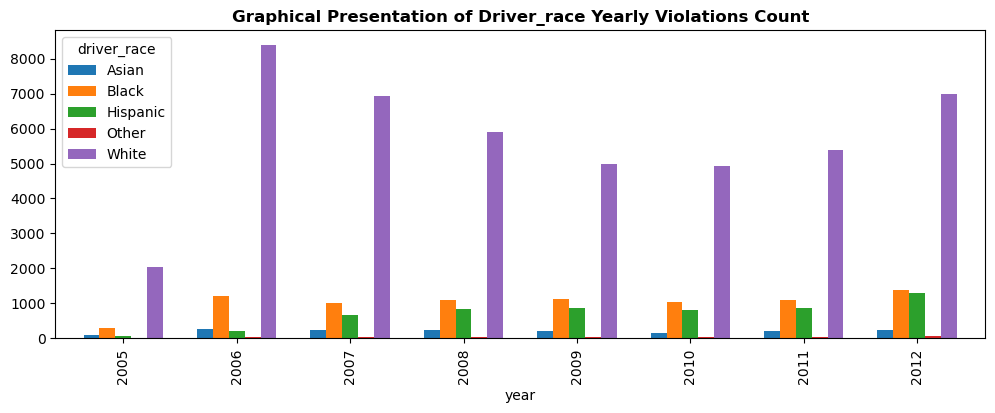

In [15]:
ax=dfa_race_year.plot(kind='bar',figsize=(12,4),width=.7)
plt.title('Graphical Presentation of Driver_race Yearly Violations Count',fontweight='bold')
plt.show()

In [16]:
data=dfa.groupby(['year','driver_race'])['violations'].count().reset_index()
fig=px.sunburst(data,path=('year','driver_race','violations'))
fig.update_layout(title={'text':'<b>Sunbrust Plot of Driver-Race Yearly Violations Count','x':0.5})
fig.show()


- Driver_race Count (Monthly)

In [17]:
dfa_month_race=dfa.groupby(['year-month','driver_race'])['violations'].count().reset_index()
fig=px.bar(dfa_month_race,x='year-month',y='violations',color='driver_race')
fig.update_layout(title={'text':'<b>Drivers Race Violation Count (monthly)','x':0.5})
fig.show()

#### 3- Violation (Types)

- Violation (Types) Count and % Count

In [18]:
dfa_violation=dfa['violation'].value_counts().reset_index()
dfa_violation['%count']=round(dfa_violation['count']*100/dfa_violation['count'].sum(),2)
dfa_violation

,violation,count,%count
0,Speeding,37119,60.63
1,Moving violation,11876,19.40
2,Equipment,6507,10.63
3,Other,3477,5.68
4,Registration/plates,2240,3.66
5,Seat belt,3,0.00


- Violation (Types) Count (Yearly)

In [19]:
dfa_year_vio_typ=dfa.pivot_table('violations',index='year',columns='violation',aggfunc='count')
dfa_year_vio_typ

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
year,,,,,,
2005,169.0,378.0,54.0,76.0,NaN,1812.0
2006,638.0,1288.0,186.0,281.0,NaN,7708.0
2007,593.0,995.0,243.0,282.0,NaN,6775.0
2008,457.0,1354.0,616.0,269.0,NaN,5381.0
2009,697.0,1487.0,738.0,375.0,NaN,3896.0
2010,835.0,1503.0,592.0,321.0,NaN,3701.0
2011,1144.0,1911.0,554.0,280.0,NaN,3677.0
2012,1974.0,2960.0,494.0,356.0,3.0,4169.0


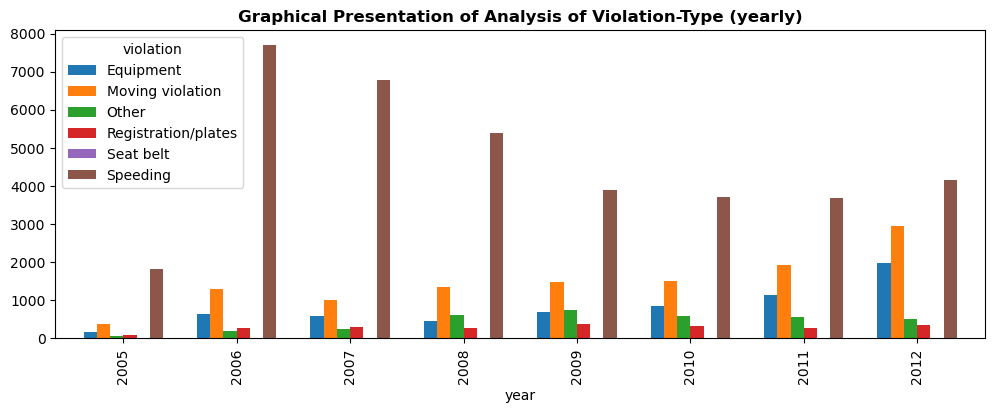

In [20]:
ax=dfa_year_vio_typ.plot(kind='bar',figsize=(12,4),width=.7)
plt.title('Graphical Presentation of Analysis of Violation-Type (yearly)',fontweight='bold')
plt.show()

- Violation (Types) Count (Monthly)


In [21]:
dfa_month_vtype=dfa.groupby(['year-month','violation'])['violations'].count().reset_index()
fig=px.bar(dfa_month_vtype,x='year-month',y='violations',color='violation')
fig.update_layout(title={'text':'<b>Violation-types Count (Monthly)','x':0.5})
fig.show()


#### 4- Driver_Gender

- Driver_Gender Count and %Count (2005~2012)

In [22]:
# Driverr's violations count from 2005_2012
dfa_gender=dfa['driver_gender'].value_counts().reset_index()
dfa_gender['% count']=round(dfa_gender['count']*100/dfa_gender['count'].sum(),2)
dfa_gender

,driver_gender,count,% count
0,M,44947,73.42
1,F,16275,26.58


- Driver_Gender Count (Yearly)

In [23]:
dfa_year_gender=(dfa.pivot_table('violation',index='year',columns='driver_gender',aggfunc='count')).reset_index()
dfa_year_gender

driver_gender,year,F,M
0,2005,645,1844
1,2006,2778,7323
2,2007,2522,6366
3,2008,2113,5964
4,2009,1704,5489
5,2010,1825,5127
6,2011,1887,5679
7,2012,2801,7155


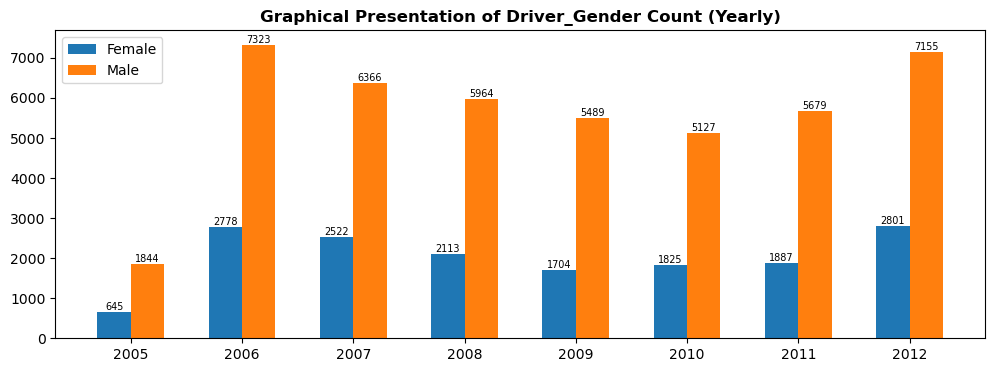

In [56]:
labels=dfa_year_gender.year.values
width=.3
x=np.arange(len(labels))
fig,ax=plt.subplots(figsize=(12,4))
rect1=ax.bar(x-width/2,dfa_year_gender.F,width,label='Female')
rect2=ax.bar(x+width/2,dfa_year_gender.M,width,label='Male')
ax.set_xticks(x), ax.set_xticklabels(labels)
ax.bar_label(rect1,fontsize=7), ax.bar_label(rect2,fontsize=7)
plt.title('Graphical Presentation of Driver_Gender Count (Yearly)',fontweight='bold')
ax.legend()
plt.show()

- Driver_Gender Count (Monthly)

In [57]:
dfa_month_gender=dfa.groupby(['year-month','driver_gender'])['violations'].count().reset_index()
fig=px.bar(dfa_month_gender,x='year-month',y='violations',color='driver_gender')
fig.update_layout(title={'text':'<b>Driver_Gendr Count (Monthly)','x':0.5})
fig.show()

In [84]:
# Comparison of violation 'Speeding' of Male and Female
dfa_gender=dfa[dfa.violation=='Speeding'].driver_gender.value_counts().reset_index()
dfa_gender['%count']=round(dfa_gender['count']*100/dfa_gender['count'].sum(),2)
dfa_gender

,driver_gender,count,%count
0,M,25458,68.58
1,F,11661,31.42


#### 5- Driver_Age 

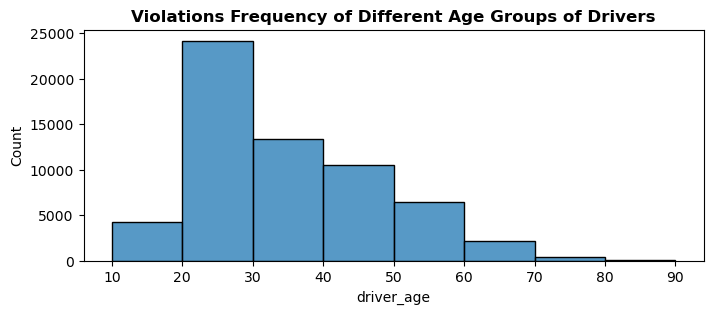

In [26]:
plt.figure(figsize=(8,3))
sns.histplot(data=dfa,x='driver_age',bins=[10,20,30,40,50,60,70,80,90])
plt.title('Violations Frequency of Different Age Groups of Drivers',fontweight='bold')
plt.show()

In [91]:
# Age Distribution of Driver_Age for Each Tyoe of Violation
dfa.groupby('violation')[['driver_age']].describe()

driver_age                                                \
                         count       mean        std   min   25%   50%   75%   
violation                                                                      
Equipment               6507.0  31.682957  11.380671  16.0  23.0  28.0  39.0   
Moving violation       11876.0  36.736443  13.258350  15.0  25.0  35.0  47.0   
Other                   3477.0  40.362381  12.754423  16.0  30.0  41.0  50.0   
Registration/plates     2240.0  32.656696  11.150780  16.0  24.0  30.0  40.0   
Seat belt                  3.0  30.333333  10.214369  23.0  24.5  26.0  34.0   
Speeding               37119.0  33.262803  12.615878  15.0  23.0  30.0  42.0   

                           
                      max  
violation                  
Equipment            81.0  
Moving violation     86.0  
Other                86.0  
Registration/plates  74.0  
Seat belt            42.0  
Speeding             88.0

#### 6- Stop_Duarations 

- Stop-Durations Count and % Count (2005~2012)

In [27]:
dfa_stop_dur=dfa['stop_duration'].value_counts().reset_index()
dfa_stop_dur['%count']=round(dfa_stop_dur['count']*100/dfa_stop_dur['count'].sum(),2)
dfa_stop_dur


,stop_duration,count,%count
0,0-15 Min,47202,77.10
1,16-30 Min,11377,18.58
2,30+ Min,2642,4.32
3,2,1,0.00


In [87]:
# Mean Stop Duration
dfa['stop_dur_mean']=dfa['stop_duration'].map({'0-15 Min':7.5,'16-30 Min':23,'30+ Min':35,'2':2})
dfa['stop_dur_mean'].mean()

11.567051060076443

- Stop_Duration Count (Yearly)

In [28]:
dfa_year_stpdur=dfa.pivot_table('violations',index='year',columns='stop_duration',aggfunc='count')
dfa_year_stpdur

stop_duration,0-15 Min,16-30 Min,2,30+ Min
year,,,,
2005,2032.0,353.0,NaN,104.0
2006,8662.0,1109.0,NaN,330.0
2007,6911.0,1601.0,NaN,376.0
2008,5444.0,2219.0,NaN,414.0
2009,4949.0,1854.0,NaN,390.0
2010,5040.0,1555.0,NaN,357.0
2011,5754.0,1417.0,NaN,395.0
2012,8410.0,1269.0,1.0,276.0


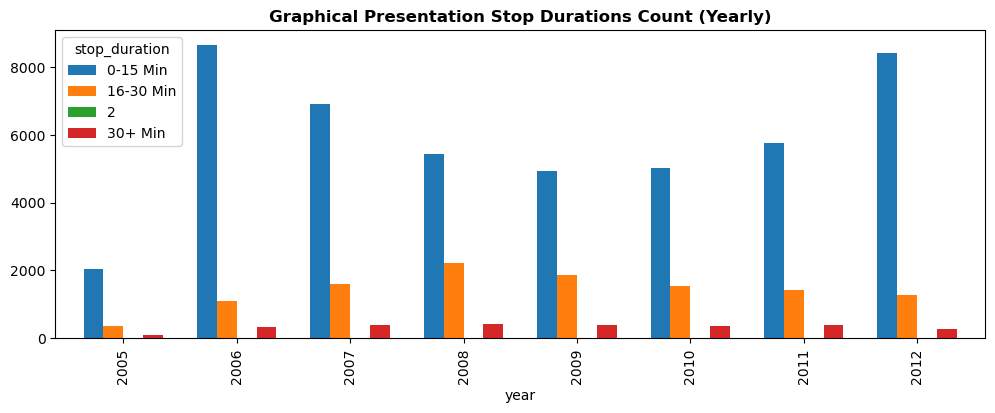

In [54]:
dfa_year_stpdur.plot(kind='bar',figsize=(12,4),width=.7)
plt.title('Graphical Presentation Stop Durations Count (Yearly)',fontweight='bold')
plt.show()

- Stop_Duration Count (Monthly)

In [55]:
dfa_month_stpdur=dfa.groupby(['year-month','stop_duration'])['violations'].count().reset_index()
fig=px.bar(dfa_month_stpdur,x='year-month',y='violations',color='stop_duration')
fig.update_layout(title={'text':'<b>Stop_Duration Count (monthly)','x':0.5})
fig.show()

#### 7- Stop_Outcome

- Stop_Outcome Count and %  Count (2005 ~ 2012)

In [31]:
dfa_stop_outcome=dfa['stop_outcome'].value_counts().reset_index()
dfa_stop_outcome['%count']=round((dfa_stop_outcome['count']*100/dfa_stop_outcome['count'].sum()),2)
dfa_stop_outcome

,stop_outcome,count,%count
0,Citation,56394,92.11
1,Arrest Driver,2007,3.28
2,Warning,1831,2.99
3,N/D,423,0.69
4,No Action,316,0.52
5,Arrest Passenger,251,0.41


In [32]:
dfa_year_stop_outcome=dfa.pivot_table('violations',index='year',columns='stop_outcome',aggfunc='count')
dfa_year_stop_outcome

stop_outcome,Arrest Driver,Arrest Passenger,Citation,N/D,No Action,Warning
year,,,,,,
2005,172,11,2216,40,10,40
2006,416,45,9334,109,46,151
2007,237,24,8415,43,48,121
2008,201,19,7691,19,54,93
2009,244,35,6720,30,44,120
2010,217,37,6287,71,29,311
2011,235,38,6908,41,38,306
2012,285,42,8823,70,47,689


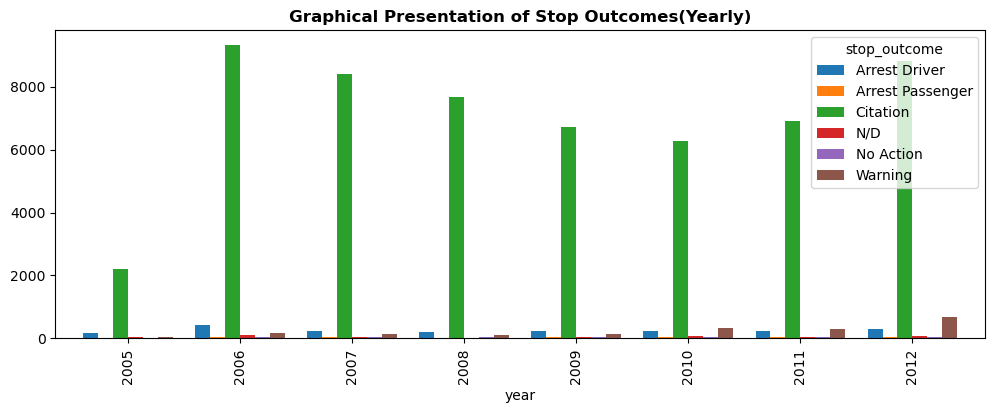

In [33]:
dfa_year_stop_outcome.plot(kind='bar',width=.8,figsize=(12,4))
plt.title('Graphical Presentation of Stop Outcomes(Yearly)', fontweight='bold')
plt.show()

- Stop_Outcome Violations Count (Monthly)

In [34]:
dfa_month_stop_outcome=(dfa.groupby(['year-month','stop_outcome'])[['violations']].count()).reset_index()
fig=px.bar(dfa_month_stop_outcome,x='year-month',y='violations',color='stop_outcome')
fig.update_layout(title={'text':'<b>Stop-Outcome Count (Monthly)','x':0.5,'y':.9,'font_size':14})
fig.show()


#### 8- Is_Arrested

- Is_Arrested Count and % Count (2005~2012)

In [35]:
dfa_arrest=pd.DataFrame(dfa['is_arrested'].value_counts())
dfa_arrest['%count']=round(dfa_arrest['count']*100/dfa_arrest['count'].sum(),2)
dfa_arrest

,count,%count
is_arrested,,
False,58964,96.31
True,2258,3.69


-  Count of Male & Female arrested

In [97]:
dfa.groupby('driver_gender')[['is_arrested']].sum()

,is_arrested
driver_gender,
F,463
M,1795


- Is_Arreste Count and % Count (Yearly) 

In [36]:
dfa_year_arrest=dfa.groupby(['year','is_arrested'])['violations'].count().reset_index()
fig=px.bar(dfa_year_arrest,x='year',y='violations',color='is_arrested')
fig.update_layout(title={'text':'<b>Is-Arrested Count (Yearly)','x':0.5})
fig.show()

- Is_arrested Count (Monthly)

In [37]:
dfa_month_arrest=dfa.groupby(['year-month','is_arrested'])['violations'].count().reset_index()
fig=px.bar(dfa_month_arrest,x='year-month',y='violations',color='is_arrested')
fig.update_layout(title={'text':'<b>Is-Arrested Count (Monthly)','x':0.5})
fig.show()

#### 9- Search_Conducted

- Search_Conducted Count and % Count (2005~2012)

In [38]:
dfa_search=pd.DataFrame(dfa['search_conducted'].value_counts())
dfa_search['%count']=round(dfa_arrest['count']*100/dfa_arrest['count'].sum(),2)
dfa_search

,count,%count
search_conducted,,
False,58745,96.31
True,2477,3.69


- Comparison of Male and Female for search_conducted

In [95]:
dfa.groupby('driver_gender')[['search_conducted']].sum()

,search_conducted
driver_gender,
F,366
M,2111


- Search_Conducted Count (Yearly)

In [39]:
dfa_year_search=dfa.groupby(['year','search_conducted'])['violations'].count().reset_index()
fig=px.bar(dfa_year_search,x='year',y='violations',color='search_conducted')
fig.update_layout(title={'text':'<b>search_conducted Count (Yearly)','x':0.5})
fig.show()

- Search_Conducted Count (Monthly)

In [40]:
dfa_month_search=dfa.groupby(['year-month','search_conducted'])['violations'].count().reset_index()
fig=px.bar(dfa_month_search,x='year-month',y='violations',color='search_conducted')
fig.update_layout(title={'text':'<b>search_conducted Count (Monthly)','x':0.5})
fig.show()

#### 10- Drugs_Related_Stop

- Drug_Related_Stop Count and % Count (2005~2012)

In [41]:
dfa_drug=pd.DataFrame(dfa['drugs_related_stop'].value_counts())
dfa_drug['%count']=round(dfa_drug['count']*100/dfa_drug['count'].sum(),2)
dfa_drug

,count,%count
drugs_related_stop,,
False,60704,99.15
True,518,0.85


- Male and Female count for Drug_related_stop

In [101]:
dfa.groupby('driver_gender')[['drugs_related_stop']].sum()

,drugs_related_stop
driver_gender,
F,56
M,462


- Drug_Related_Stop Count (Yearly)

In [42]:
dfa_year_drug=dfa.groupby(['year','drugs_related_stop'])['violations'].count().reset_index()
fig=px.bar(dfa_year_drug,x='year',y='violations',color='drugs_related_stop')
fig.update_layout(title={'text':'<b>Drugs Related Stop Count (Yearly)','x':0.5})
fig.show()

- Drug_Related_Stop Count (Monthly)

In [43]:
dfa_month_drug=dfa.groupby(['year-month','drugs_related_stop'])['violations'].count().reset_index()
fig=px.bar(dfa_month_drug,x='year-month',y='violations',color='drugs_related_stop')
fig.update_layout(title={'text':'<b>Drugs Related Stop Count (Monthly)','x':0.5})
fig.show()

In [ ]:
pd.write()